In [1]:
import matplotlib.pyplot as plt
from qiskit import IBMQ
import numpy as np
from matplotlib.pyplot import figure
import datetime
from threading import Thread

In [2]:
provider = IBMQ.load_account()

In [3]:
hw_backend = provider.get_backend("ibmq_manila")

In [4]:
hw_config = hw_backend.configuration()
hw_properties = hw_backend.properties()

In [8]:
day_samples = []
days = []

t_d = []
time = datetime.datetime(year=2022, month=1, day=1)
while time < datetime.datetime(year=2022, month=7, day=1):
	time += datetime.timedelta(days=1)
	t_d.append(time)
t = [None] * len(t_d)
t_s = [None] * len(t_d)

def wrapper(day, prop_rtn, i):
	prop_rtn[i] = hw_backend.properties(datetime=day[i])

for i in range(len(t)):
	t[i] = Thread(target=wrapper, args=(t_d, t_s, i))
	t[i].start()

for i in range(len(t)):
    t[i].join()

for i in range(len(t)):
	prop = t_s[i]
	time = t_d[i]
	if prop:
		day_samples.append(prop)
		days.append(prop.last_update_date)

In [9]:
day_errors = []
for sample in day_samples:
	q_err = []
	for i in range(hw_config.n_qubits):
		q_err.append(sample.gate_error("x", i))
	day_errors.append(q_err)
day_errors = np.array(day_errors)

In [10]:
(1/10000)*100

0.01

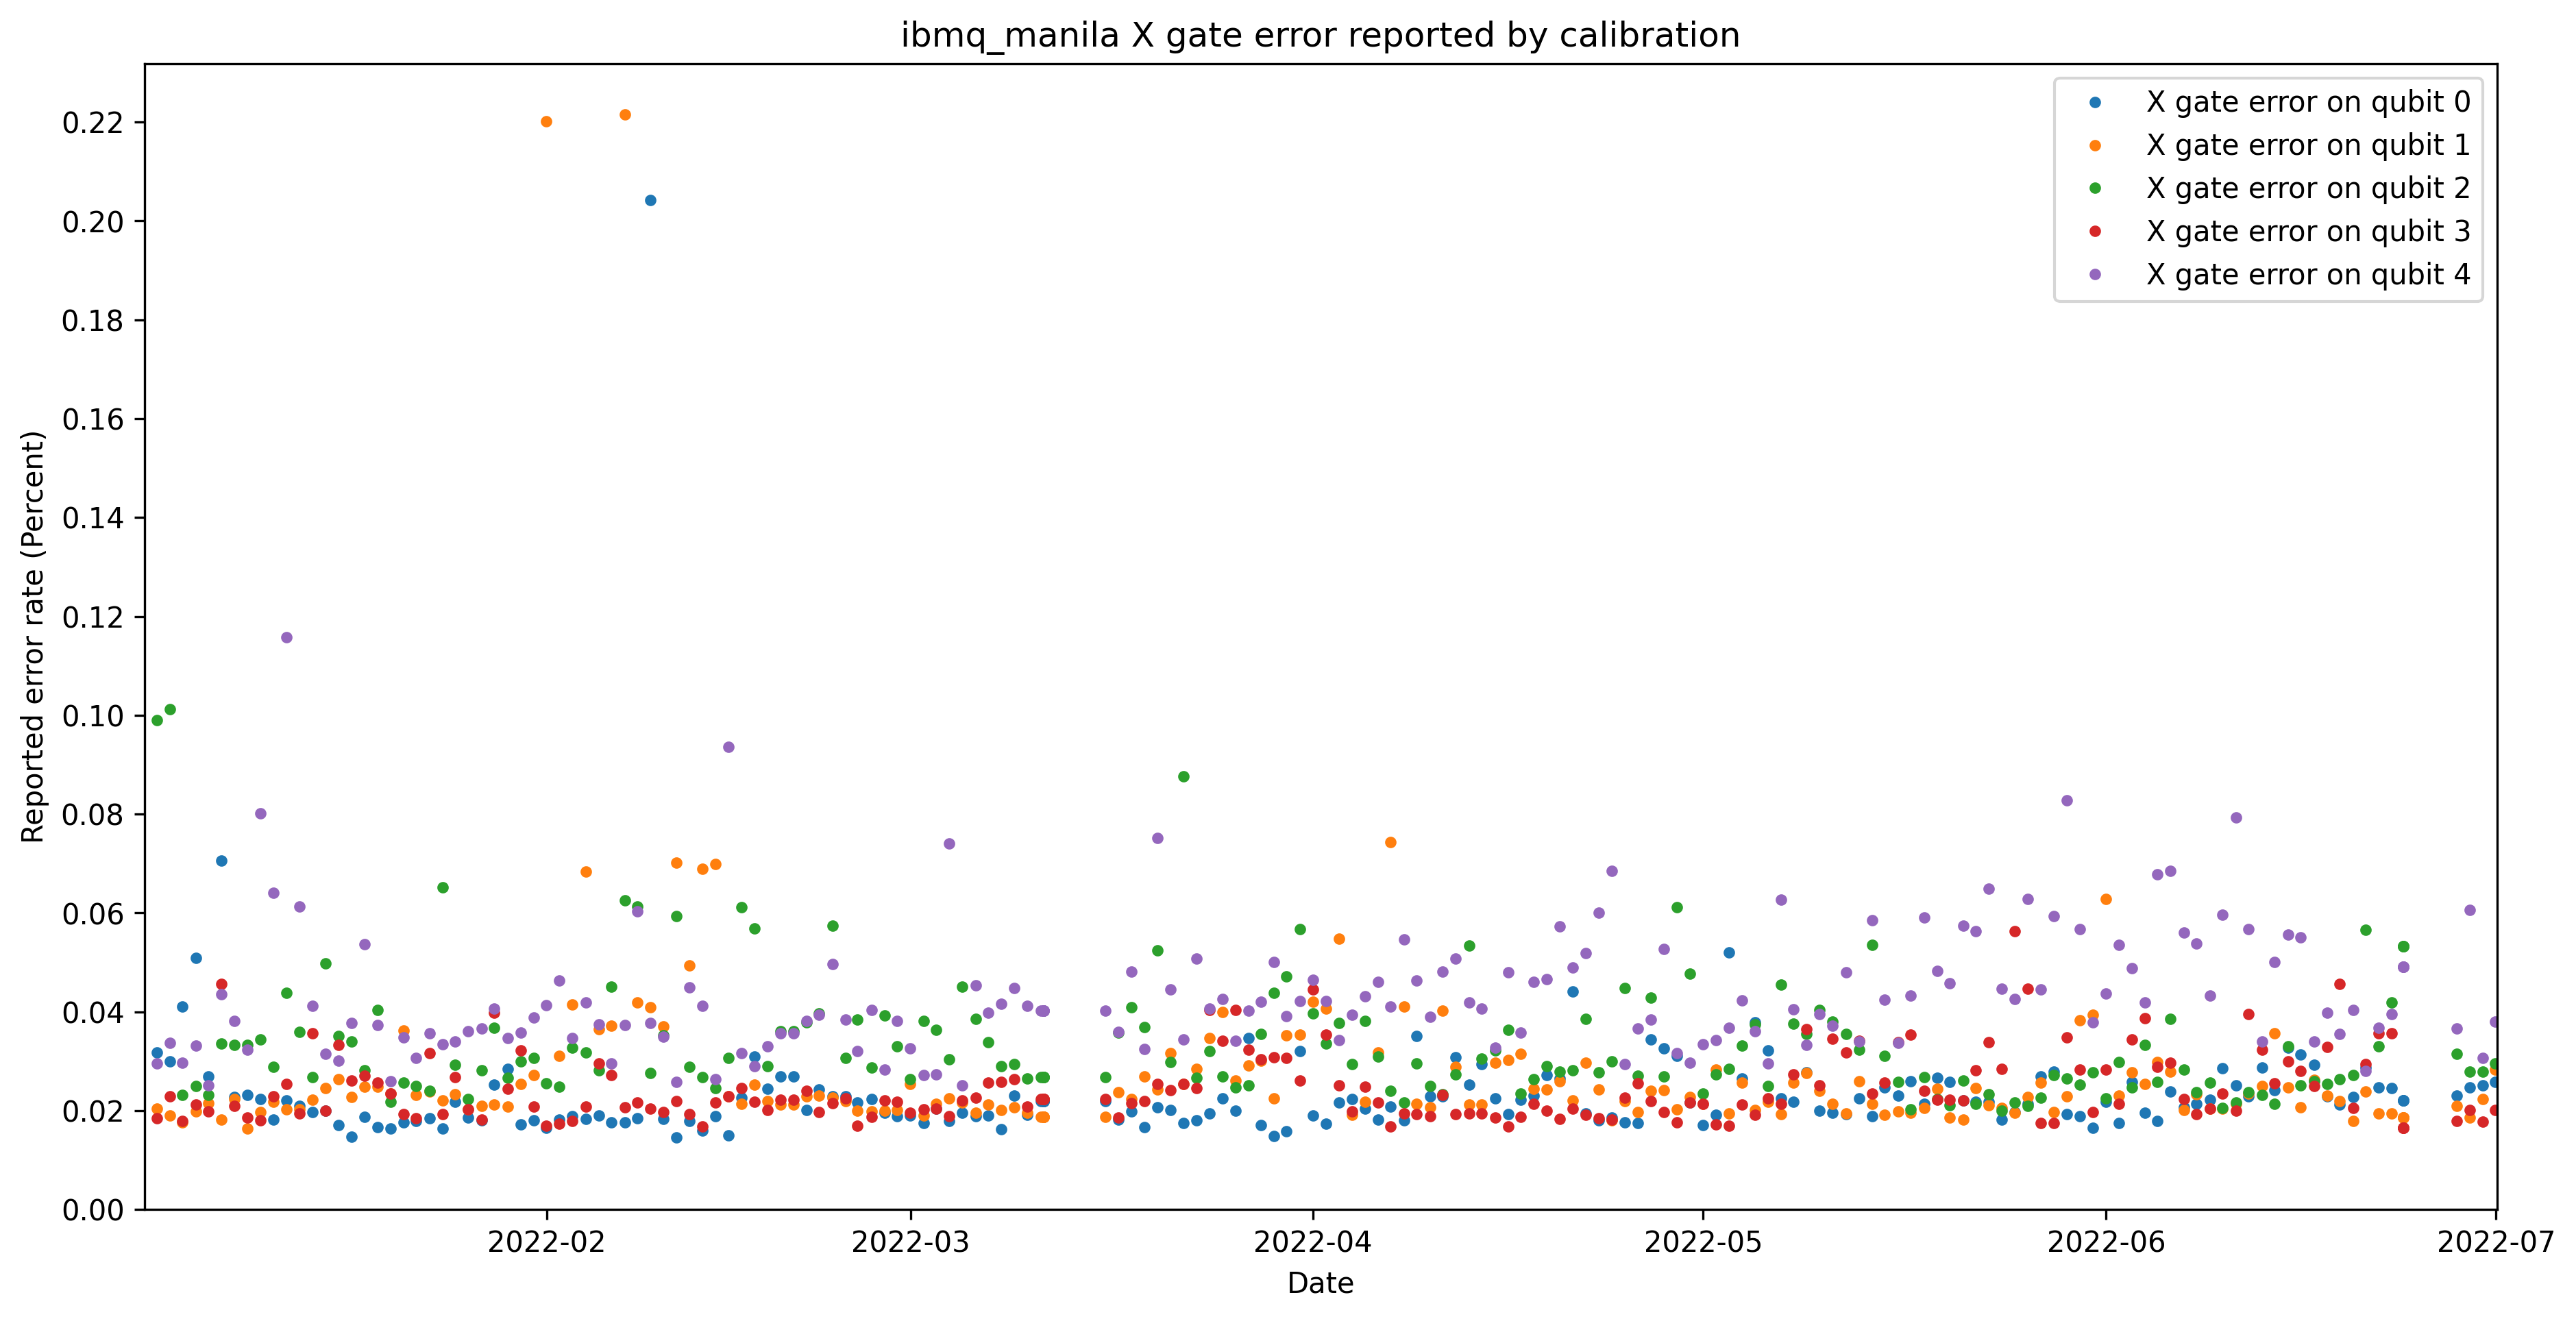

In [11]:
factor = 2.5
figure_width = 5.90666*factor
figure_heigth = 5.90666*factor/2
dpi = 300
figure(figsize=(figure_width, figure_heigth), dpi=dpi)

for i in range(hw_config.n_qubits):
	plt.plot(days, day_errors[:, i]*100, ".", label=f"X gate error on qubit {i}")

plt.yticks(np.arange(0, day_errors.max()*100, 0.02))
plt.title("ibmq_manila X gate error reported by calibration")
plt.ylabel("Reported error rate (Percent)")
plt.xlabel("Date")
plt.xlim(datetime.datetime(year=2022, month=1, day=1), datetime.datetime(year=2022, month=7, day=1))
plt.legend()
plt.savefig("../images/x_error_over_time.png", bbox_inches='tight')

In [12]:
day_errors_types = []
for sample in day_samples:
	q_err = []
	q_err.append(sample.gate_error("x", 0))
	q_err.append(sample.gate_error("cx", (0, 1)))
	q_err.append(sample.gate_error("sx", 0))
	q_err.append(sample.gate_error("rz", 0))
	q_err.append(sample.gate_error("id", 0))
	day_errors_types.append(q_err)
day_errors_types = np.array(day_errors_types)
gates = ["x", "cx", "sx", "rz", "id"]

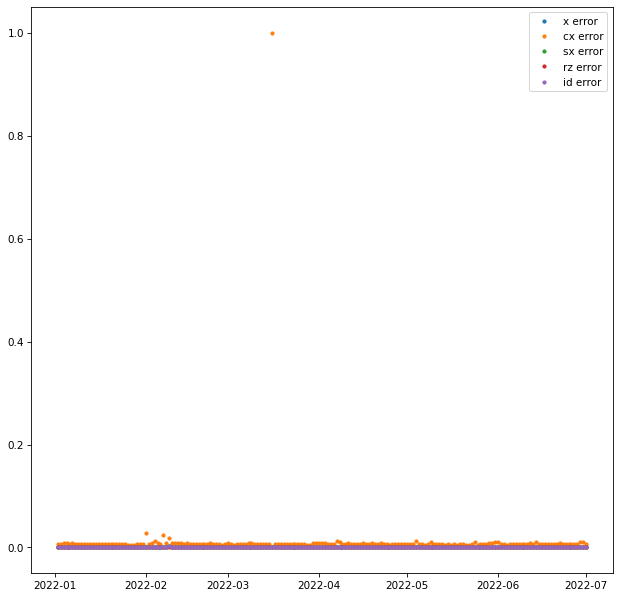

In [13]:
figure(figsize=(10, 10), dpi=75)
for i, gate in enumerate(gates):
	plt.plot(days, day_errors_types[:, i], ".", label=f"{gate} error")
	
plt.legend()